# Beautiful Soup

Beautiful Soup (**BS**) — модуль для извлечения данных из HTML и XML файлов, который позволяет эффективно осуществлять парсинг. Обычно экономит программистам часы и дни работы.

Блокнот основан на материалах из документации https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html

## Введение

**Необходимые модули:**

from bs4 import BeautifulSoup <br>
import requests <br>
import [lxml](https://lxml.de/)<br>
import html5lib

Если у вас они не установлены, то можно установить их локально с помощью команды в терминале :

      pip install название_модуля,

или в google.colaboratory:

      !pip install название_модуля

Вместо lxml можно использовать другие парсеры, например, *html5lib*

In [ ]:
import bs4  # Модуль BeautifulSoup
from bs4 import BeautifulSoup  # Удобно импортировать класс BeautifulSoup отдельно

import requests  # Модуль для запросов HTTP
import lxml  # Модуль работы с XML
import html5lib  # 
import re  # Модуль регулярных выражений

Напишем функцию, которая будет выводить аргумент на экран и переносить текст на новую строку:

In [ ]:
def my_print(s):  # Функция выведет аргумент и перенос строки
    print(s, '\n')

Предположим, что у нас есть какой-то .html-файл. Представим его как многострочную строку:

In [ ]:
html_doc = """
<html><head><title>Обычная история</title></head>
<body>
<p class="title"><b>Обычная история</b></p>

<p class="story">Жили-были три сестры:
<a href="http://example.com/olga" class="sister" id="link1">Ольга</a>,
<a href="http://example.com/anna" class="sister" id="link2">Анна</a> и
<a href="http://example.com/tanya" class="sister" id="link3">Татьяна</a>
в большом доме.</p>

<p class="story">...</p>
"""

Если представить документ как экземпляр класса BeautifulSoup, то он будет преобразован во вложенную структуру данных:

In [ ]:
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())  # pretify преобразует вывод документа в иерархическую структуру

### Разбор документа
Еще немного о чтении документов. Можно передавать документы в виде файлов, используя контекстное ключевое слово *with*. Ниже мы также научимся подключать данные с сайтов.

In [ ]:
from bs4 import BeautifulSoup

# Создадим файл, который затем прочитаем:
with open('index.html', 'w') as my_file:
    my_file.write(soup.text)

# Чтения файла
with open("index.html") as fp:
    soup = BeautifulSoup(fp)
print(soup)

In [ ]:
# Инициализация с документом в виде строки
soup = BeautifulSoup("<html>data</html>")

Теперь, когда наш документ является экземпляром класса BeautifulSoup, мы можем применять встроенные методы для парсинга документа. 
Сначала документ конвертируется в Unicode, а [HTML-мнемоники](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%B5%D0%BC%D0%BE%D0%BD%D0%B8%D0%BA%D0%B8_%D0%B2_HTML) конвертируются в символы Unicode:

In [ ]:
# BS создаст документ с тегами <html>, <body> и <p>
BeautifulSoup("Sacr&eacute!")  # &eacute - это специальный символ, означающий ударение во французском языке

После этого **BS** воспользуется парсером для анализи документа. По умолчанию BeautifulSoup будет использовать HTML-парсер. Если вы хотите использовать XML-парсер, то необходимо явно указать это.

## Виды объектов

**BS** преобразует HTML-документ в дерево объектов Python. Основными являются следующие 4 типа объектов: **Tag, NavigableString, BeautifulSoup и Comment.**

### Tag (тег)
Объект Tag является тегом разметки (HTML, к примеру) в исходном документе:

In [ ]:
soup = BeautifulSoup('<head>Заголовок документа</head>')
tag = soup.head  # soup.head будет искать тег head в нашем документе
print(tag)  # Посмотрим, что записалось в переменную тег
print(tag.name)  # Посмотрим название тега
type(tag)  # Посмотрим тип переменной

tag2 = soup.body  # Попробуем найти тег body
print(tag2)  # Ничего не найдется, потому что в документе нет тега body

Имя тега можно менять. Если после этого пересобрать html-документ заново, разметка изменится в соответствии с изменениями тегов:

In [ ]:
tag.name = "new_name"  # Поменяем имя тега
print(tag)

### Атрибуты
Тег может иметь произвольное число атрибутов.

Например, у тега `<b id="new_id">` есть атрибут `id`, значение которого равно `new_id`. Получить доступ к атрибутам тега можно также, как к элементам словаря:

In [ ]:
soup = BeautifulSoup('<b id="new_id">Привет, мир!</b>')
tag = soup.b
print(tag['id'])  # new_id

Можно можно обратиться с помощью .attrs:

In [ ]:
print(tag.attrs)  

Путем обращения с тегом как со словарем можно добавлять, удалять и изменять атрибуты тега:

In [ ]:
tag['id'] = 'another_name'
tag['another_attribute'] = 1
tag.attrs  # Выведем новый словарь

Элементы словаря можно удалять также как самые обычные объекты:

In [ ]:
del tag['id']  
del tag['another-attribute']
print(tag.attrs)  # Сейчас словарь пуст
print(tag)  # Но сам тег никуда не делся

### Многозначные атрибуты

HTML 4 считается устаревшим, однако на многих сайтах он до сих пор используется. В [HTML 4](https://www.w3.org/TR/html401/) есть атрибуты, которые имеют несколько значений. Например, тег **class** является многозначным (т.е. у тега может быть несколько классов, к которым он относится). Также многозначными являются атрибуты **accept-charset, accesskey, headers, rel, rev**. **BS** хранит значения многозначных атрибутов в списке:

In [ ]:
css_soup = BeautifulSoup('<p class="body"></p>')  # Зададим тег с одним классом
css_soup.p['class']

In [ ]:
css_soup = BeautifulSoup('<p class="body out"></p>')  # Зададим тег с двумя классами
css_soup.p['class']

## NavigableString 
**NavigableString** - это строка, которая соответствует тексту внутри тега. 

**BS** использует класс **NavigableString** для хранения следующих фрагментов текста:

In [ ]:
print(tag.string) 

In [ ]:
type(tag.string)  # bs4.element.NavigableString

Нельзя редактировать строку непосредственно, но можно заменить ее, используя **replace_with()**:

In [ ]:
tag.string.replace_with("Привет, человек!")
print(tag)  

Для использования **NavigableString** вне **BS**, необходимо вызвать соответствующий метод приведения типов. Если этого не сделать, то строка будет содержать в себе все дерево разбора **BS**, даже когда вы закончите использовать **BS**. Это приведет к большому расходу памяти.

In [ ]:
b = tag.string
print(type(b))
print(b)
print(dir(b))  # Выведет все методы класса BeautifulSoup
print('-'*50) 
b = str(tag.string)  # Приведем к типу String
print(type(b))
print(b)
print(dir(b))  # Выведет все методы класса String

Объект **BeautifulSoup** — разобранный документ как единое целое. В большинстве случаев вы можете рассматривать его как объект Tag.

Пример: объединение двух разобранных документов:

In [ ]:
doc = BeautifulSoup("<document><content/>Вставьте нижнюю часть тут</document", "xml")  # Документ 1
footer = BeautifulSoup("<footer>Подвал страницы</footer>", "xml")  # Документ 2

# Заменяем текст документа 1 на текст из footer документа 2
doc.find(text="Вставьте нижнюю часть тут").replace_with(footer)
print(doc)  # Выводим результат замены

## Комментарии 
Комментарии также являются важной частью html или xml разметки.
Мы научимся вычленять их из текста документа.

In [ ]:
markup = "<b><!--Какой-то текст--></b>"  # Какой-то тег, внутри которого содержится комментарий
soup = BeautifulSoup(markup)  # Инициализируем экземпляр класса Beautiful Soup
comment = soup.b.string  # Вычленяем комментарий из текста
type(comment)  # bs4.element.Comment
print(comment)  # Какой-то текст

Объект Comment — особый тип NavigableString. Когда Comment появляется как часть HTML-документа, он отображается со специальным форматированием:

In [ ]:
print(soup.b.prettify())

# Навигация 

In [ ]:
soup = BeautifulSoup (html_doc, 'html.parser')  # Стандартный способ инициализации экземпляра Beautiful Soup
print(soup)

## Проход сверху вниз
Теги могут содержать строки и другие теги, которые являются дочерними (children). **BS** предоставляет различные возможности для навигации по документу и для перебора дочерних элементов.

### Навигация с по именам тегов

Один способ навигации по дереву разбора — указать имя нужного тега. Если нужен тег `<head>`, просто напишите soup.head:

In [ ]:
soup.head  # Тег head

In [ ]:
soup.title  # Тег title

Получим первый тег `<b>`, который находится внутри тега `<body>`:

In [ ]:
soup.body.b  # Если тегов b несколько, не рассчитывайте найти все таким способом

Имя тега в качестве атрибута даст только первый тег с таким именем:

In [ ]:
soup.a  # Если тегов a несколько, не рассчитывайте найти все таким способом

Если нужно получить все теги `<a>`, то нужно использовать, например, find_all():

In [ ]:
soup.find_all('a')  # Метод find_all найдет все теги a

### .children и .contents  
В списке .contents содержаться все дочерник элементы:

In [ ]:
head_tag = soup.head
print(head_tag)  # Сам тег head

In [ ]:
print(head_tag.contents)  # Дочерние теги head

In [ ]:
title_tag = head_tag.contents[0]  # Можно вычленять дочерние теги и присваивать их объектам
print(title_tag) 

In [ ]:
print(title_tag.contents)  # Контент для title - это его текст

Сам объект BeautifulSoup имеет дочерние элементы. Тег <html> является дочерним для объекта BeautifulSoup:

In [ ]:
print(len(soup.contents))  # Количество дочерних элементов
print(soup.contents[1].name)

Чтобы получить дочерние элементы в виде списка, можно перебирать их с помощью генератора .children:

In [ ]:
count = 0
for child in soup.children:  # Напоминаем, что генераторы действуют одноразово
    count+=1
    print(count, child)  # Выведет номер ребенка и его содержимое

### .descendants

Атрибуты `.contents` и `.children` применяются к ближайшим дочерним элементам тега. Например, у тега `<head>` один ближайший дочерний тег `<title>`.<br>
Атрибут `.descendants` позволяет перебирать все дочерние элементы тега [рекурсивно](https://pythonru.com/osnovy/rekursiya-python): его ближайшие дочерние элементы, дочерние элементы дочерних элементов и так далее. <br>
Подробнее про него можно прочитать в [документации](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#descendants)

### .string
Если у тега есть один дочерний элемент и это NavigableString, то его можно получить через .string:

In [ ]:
print(title_tag.string)

Пусть у тега есть единственный дочерний элемент, у которого есть строка .string, тогда считается, что родительский тег содержит эту же строку .string:

In [ ]:
print(head_tag.contents)  

In [ ]:
print(head_tag.string) 

Если дочерний тег содержит более одного элемента, то .string родительского тега имеет значение None:

In [ ]:
print(soup.html.string) 

### .strings и .stripped_strings
Если внутри тега более одного элемента, то можно использовать генератор .strings:

In [ ]:
for string in soup.strings:
    print(repr(string))  # repr возвращает строковое представление объекта

В строках много лишних пробелов, которые можно удалить, используя генератор .stripped_strings, суть действия которого в том, что строки, состоящие исключительно из пробелов, игнорируются, а пробелы в начале и конце строк удаляются:

In [ ]:
for string in soup.stripped_strings:
    print(repr(string))

## Проход снизу вверх

Так как струтура дерева носит иерархический характер, можно выполнять проход по элементам дерева сверху вниз или снизу вверх. Например, можно получить доступ к родительскому элементу с помощью атрибута `.parent`. Например, тег `<head>` является родительским для тега `<title>`:

In [ ]:
title_tag = soup.title
print(title_tag.parent)  

Родительским элементом тега верхнего уровня `<html>`, является объект BeautifulSoup:

In [ ]:
html_tag = soup.html
type(html_tag.parent)  # bs4.BeautifulSoup

.parent для объекта BeautifulSoup определяется как None, потому что это корневой элемент:

In [ ]:
print(soup.parent)  # None

Можно перебрать всех родителей элемента с помощью атрибута `.parents`. В примере ниже с помощью атрибута `.parents` мы делаем проход по документу от тега `a` до `BeautifulSoup`:

In [ ]:
link = soup.a  # Ссылка - тег a
print(link)

In [ ]:
for parent in link.parents:  # Цикл по элементам из генератора
    if parent is None:
        print(parent)  # Отображаем объект родителя
    else:
        print(parent.name)  # Отображаем имя родителя

## Перемещение влево-вправо

In [ ]:
# Зададим несколько вложенных тегов внутри a
sibling_soup = BeautifulSoup("<a><b>text_a</b><c>text_b</c></b></a>")
# Выведем одноуровневые элементы
print(sibling_soup.prettify())

Теги `<b>` и `<c>` на одном уровне: оба непосредственные дочерние элементы одного тега. Назовем их одноуровневыми. <br>
После форматирования документа с помощью метода **prettify** одноуровневые теги имеют одинаковый отступ. Это очень похоже на язык Python, не находите?

### .next_sibling и .previous_sibling
позволяют перемещаться между элементами страницы, которые находятся на одном уровне дерева разбора:

In [ ]:
print(sibling_soup.b.next_sibling)  # Следующий одноуровненый тег для тега b

In [ ]:
print(sibling_soup.c.previous_sibling)  # Предыдущий одноуровненый тег для тега c

При этом: у тега `<b>` нет `.previous_sibling`, т.к. нет ничего до тега `<b>` на том же уровне дерева, а у тега `<c>` нет `.next_sibling`:

In [ ]:
print(sibling_soup.b.previous_sibling)  # None
print(sibling_soup.c.next_sibling)  # None

### .next_siblings и .previous_siblings
Можно перебрать одноуровневые элементы данного тега с помощью .next_siblings или .previous_siblings:

In [ ]:
for sibling in soup.a.next_siblings:
    print(repr(sibling))

In [ ]:
for sibling in soup.find(id="link3").previous_siblings:
    print(repr(sibling))

## Проход вперед и назад

С проходом вперед и назад можно ознакомиться в [документации](https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html#id26)

# Поиск по дереву разбора

В **BS** есть методы два самых популярных метода поиска по дереву разбора: find() и find_all(). 

Тот же самый фрагмент текста:

In [ ]:
html_doc = """
<html><head><title>Обычная история</title></head>
<body>
<p class="title"><b>Обычная история</b></p>

<p class="story">В большом доме жили-были три сесты :</p>
<a href="http://example.com/olga" class="sister" id="link1">Ольга</a>,
<a href="http://example.com/anna" class="sister" id="link2">Анна</a> и
<a href="http://example.com/tanya" class="sister" id="link3">Татьяна</a>

<p class="story">...</p>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup (html_doc, 'html.parser')

## Типы фильтров

Фильтры можно использовать их для фильтрации по имени тега, по его атрибутам, по тексту строки или по некоторой их комбинации.


### Строка

**BS** выполняет поиск по строке. Следующий код находит все теги `<p>` в документе:

In [ ]:
soup.find_all('p')

### Регулярное выражение

**BS** отфильтрует результаты в соответствии с переданным регулярным выражением и методом `search()`. Код находит все теги, имена которых начинаются с буквы “b”, в нашем случае это теги `<body>` и `<b>`:

In [ ]:
import re
for tag in soup.find_all(re.compile("^b")):  # Все теги, которые начинаются с b
    print(tag.name)

Этот код находит все теги, имена которых содержат букву “l”:

In [ ]:
for tag in soup.find_all(re.compile("l")):  # compile компилирует регулярное выражение
    print(tag.name)

Если передать **список**, то **BS** найдет строки с любым элементом из этого списка. Код находит все теги `<a>` и `<b>`:

In [ ]:
soup.find_all(["a", "b"])

### Значение **True**
Код находит все теги в документе, но не текстовые строки:

In [ ]:
for tag in soup.find_all(True):
    print(tag.name)

### Функция

Можно определить функцию, которая принимает элемент в качестве единственного аргумента. Функция возвращает True, когда аргумент подходит, и False, когда нет.

Функция возвращает True, если у тега есть атрибут “class” и нет аттрибута “id”:

In [ ]:
def class_no_id(tag):
    return tag.has_attr('class') and not tag.has_attr('id')

Передав эту функцию в `find_all()`, и получим все теги `<p`>:

In [ ]:
soup.find_all(class_no_id)  # Ищем теги имеющие класс и не имеющие id

Эта функция выбирает только теги `<p>`, не выбирает теги `<a>` (в них определены и атрибуты “class” и “id”), не выбирает теги вроде `<html>` и `<title>` (в них не определен атрибут “class”).

Если используете функцию для фильтрации по определенному атрибуту (например, href), то переданным в функцию аргументом, будет значение атрибута (а не весь тег). Функция находит все `<a>`, у которых атрибут `href` не соответствует регулярному выражению:

In [ ]:
def not_lacie(href):
    return href and not re.compile("anna").search(href)
soup.find_all(href=not_lacie)

## find_all()

find_all() извлекает всех потомков тега, которые соответствуют  фильтрам: 

In [ ]:
my_print(soup.find_all("title"))
my_print(soup.find_all("p", "title"))  # p и title одновременно (тег и класс)
my_print(soup.find_all("a"))
my_print(soup.find_all(id="link2"))

import re
print(soup.find(string=re.compile("sisters")))

Посмотрим аргументы find_all().

### Аргумент 

Если передать значение для аргумента `name`, то **BS** будет рассматривать только теги с определенными именами. Будут игнорироваться текстовые строки и теги, имена которых не соответствуют заданным.

Пример:

In [ ]:
soup.find_all("title")

### Именованные аргументы

Нераспознанный аргумент порождает фильтр по атрибуту тега. Если передать значение для аргумента id, то **BS** будет фильтровать по атрибуту “id”:

In [ ]:
soup.find_all(id='link3')

Если передать значение `href`, то **BS** отфильтрует по атрибуту “href” каждого тега:

Для фильтрации по атрибуту можно использовать регулярное выражение, строку, функцию, значение True.

Код находит все теги, атрибут id которых имеет какое-нибудь значение:

In [ ]:
soup.find_all(id=True)

Можно отфильтровать несколько атрибутов одновременно, если передать несколько именованных аргументов:

In [ ]:
soup.find_all(href=re.compile("olga"), id='link1')

# Аргумент string

С помощью string можно искать строки вместо тегов. Передаваться может регулярное выражение, строку, функцию, значение True.

Несколько примеров:


In [ ]:
my_print(soup.find_all(string="Анна"))  # Ищем строку с текстом "Анна"

my_print(soup.find_all(string=["Татьяна", "Ольга", "Анна"]))   # Совпадение с любым элементом из списка или несколькими

my_print(soup.find_all(string=re.compile("абракадабра")))  # Найдет строки, в тексте которых есть 'абракадабра'

In [ ]:
def string_within_a_tag(s):
    """Возвращает True, если string является едиственным child у родительского тега."""
    return (s == s.parent.string)

soup.find_all(string=string_within_a_tag)

Значение типа string можно комбинировать с аргументами, которые находят теги: **BS** найдет все теги, в которых .string соответствует указанному значению для string. Код находит все теги <a>, у которых .string равно “Анна”:

In [ ]:
soup.find_all("a", string="Анна")  # Тег a, текст которого равен "Анна"

## Аргумент limit

find_all() возвращает все соответсвующие фильтрам теги и строки, что займет время, особенно если документ большой. Если все результаты  не нужны, то можно указать их предельное число — limit. 

Во фрагменте исходного теста три ссылки. Блпгодаря `limit=1` будут найдена  первая:

In [ ]:
soup.find_all("a", limit=1)

## Вызов тега или find_all() 
обеспечивают одинаковый результат:

In [ ]:
my_print(soup.find_all("a"))
soup("a")

In [ ]:
my_print(soup.title.find_all(string=True))
soup.title(string=True)

# find()

Если известно, что в документе есть один тег <body>, то нет смысла сканировать весь документ с помощью `find_all()`. Вместо передачи limit=1 в find_all(), можно использовать метод `find()`. Две строки кода обеспечивают одинаковый результат:

In [ ]:
my_print(soup.find_all('title', limit=1))

soup.find('title')

Разница в этом примере: `find_all()` возвращает список, содержащий единственный результат, а `find()` возвращает сам результат.

`find_all()` возвращает пустой список, если не может ничего найти. `find()`возвращает None, если не может ничего найти:

In [ ]:
print(soup.find("nosuchtag"))  # None

Можно использовать такой прием:

In [ ]:
# Строки ниже эквивалентны
my_print(soup.head.title)
soup.find("head").find("title")

## Методы изменения дерева и исходного файла
Об изменении имен тегов и атрибутов с помощью методов .string, append(), extend(), NavigableString() и .new_tag(), insert(), insert_before() и insert_after(), clear(), extract(), decompose(), replace_with(), wrap(), unwrap(), smooth() 
можно прочитать в [документации](https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html)

# Проверка объектов на равенство

**BS** считает, что два объекта NavigableString или Tag равны, когда они представлены в одинаковой HTML или XML разметке. В примере ниже два тега `<b>` рассматриваются как равные, даже если они находятся в разных частях дерева объекта, потому что они оба содержат `<b>сок</b>`:

In [ ]:
markup = "<p>Я хочу <b>сок</b> и еще один <b>сок</b>!!</p>"
soup = BeautifulSoup(markup, 'html.parser')
first_b, second_b = soup.find_all('b')
my_print(first_b == second_b)

print(first_b.previous_element == second_b.previous_element)

Чтобы узнать, указывают ли две переменные на один и тот же объект, можно использовать is:

In [ ]:
print(first_b is second_b)

# Пример1: город Петрозаводск
Задача: на странице годорода Петрозаводск на Википедии найти и вывести все "Спортивные объекты"

In [ ]:
# Задаем ссылку
petr = 'https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B7%D0%B0%D0%B2%D0%BE%D0%B4%D1%81%D0%BA'

# Посылаем запрос и записываем ответ
website_url = requests.get(petr).text

# Представляем ответ как экземпляр класса BeautifulSoup
soup = BeautifulSoup(website_url)

print(soup)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
<head>
<meta charset="utf-8"/>
<title>Петрозаводск — Википедия</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"0fa685df-40a7-4715-ac86-14a0b2616ecd","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Петрозаводск","wgTitle":"Петрозаводск","wgCurRevisionId":122653624,"wgRevisionId":122653624,"wgArticleId":16706,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Страницы, использующие временные диаграммы","Википедия:Cite web (не указан язык)",
"Википедия:Cite web (недоступные ссылки без архивной копии)","Википедия:Ста

Код страницы был сохранен в файл Петрозаводск_Википедия.html. Обратите внимание на encoding='utf-8' при чтении файла.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')  

# Путь ниже вам необхождимо отредактировать !!!
gc_folder = r"/content/gdrive/My Drive/Colab Notebooks/"  # Стандартный путь до файлов на гугл диске 
gc_folder += r'КУРС Python для анализа данных/files/'  

Mounted at /content/gdrive


In [ ]:
# Проделываем стандартную процедуру. Открываем файл с менеджером контекста with и оформляем текст (prettify)
with open(gc_folder + 'Петрозаводск_Википедия.html', 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file.read(), 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   Петрозаводск — Википедия
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"1a906f33-cecf-46c0-b4d8-2230c5905b4d","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Петрозаводск","wgTitle":"Петрозаводск","wgCurRevisionId":115117136,"wgRevisionId":115117136,"wgArticleId":16706,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Страницы, использующие временные диаграммы",
"Википедия:Статьи с некорректным использованием шаблонов:Cite web (не указан язык)","Википедия:Статьи с некор

Реализуем последовательный "спуск" к тегу `<ul>` со спортивными объектами

In [ ]:
def get_tag(sport_soup, tag, words):
    '''
    Поиск тега на одном уровне с тегом sport_soup, внутри которго есть тег tag, 
    который содержит подстроку words
    '''
    while sport_soup:
        if isinstance(sport_soup, bs4.element.Tag):  # Если sportsoup является тегом, то:
            my_tag = sport_soup.find_all(tag, string=re.compile(words))
            if my_tag:  
                return(sport_soup)  # Получили нужный тег
        sport_soup = sport_soup.next_sibling  # Находим следующий одноуровневый тег
    raise 'Error! No tag'

In [ ]:
# Передаем первый div в body, 
# Получаем тег <div id="content" class="mv_body" role="main">
sport_soup = get_tag(soup.body.div, tag='span', words='Спорт') 

# Передаем <div id="content" class="mv_body" role="main">, 
# Получаем <div class="vector-body" id="bodyContent">
sport_soup = get_tag(soup.body.div, tag='span', words='Спорт') 

# Передаем <div class="vector-body" id="bodyContent">, 
# Получаем <div class="mw-body-content mw-content-ltr" dir="ltr" id="mw-content-text" lang="ru">
sport_soup = get_tag(soup.body.div,  tag='span', words='Спорт') 

# Передаем <div class="mw-body-content mw-content-ltr" dir="ltr" id="mw-content-text" lang="ru">, 
# Получаем <div class="mw-parser-output">
sport_soup = get_tag(soup.body.div,  tag='span', words='Спорт') 

# Передаем <div class="mw-parser-output">,
# Получаем <h3><span id=".D0.A1.D0.BF.D0.BE.D1.80.D1.82.D0.B8.D0.B2.D0.BD.D1.8B.D0.B5_.D0.BE.D0.B1.D1.8A.D0.B5.D0.BA.D1.82.D1.8B">
sport_soup = get_tag(sport_soup.h3,  tag='span', words='Спортивные объекты') 

# Находим нужный ul         
sport_soup = get_tag(sport_soup,  tag='li', words='Лыжная трасса') 

for li in sport_soup.find_all('li'):
    print(li.text)

Стадион «Спартак» (улица Герцена, 1).
Стадион «Юность» (проспект Карла Маркса, 4).
Стадион «Локомотив» (Муезерская улица).
Стадион «Машиностроитель» (улица Лисицыной, 23).
Стадион «ПЛМК» (трасса для мотокросса) (Соломенское шоссе).
Стадион «Динамо» (улица Халтурина) прекратил существование в 1990-х гг.
Спортивный комплекс «Луми» (Неглинская наб., 52).
Ледовая площадка «Вега» (набережная Варкауса).
Лыжная трасса «Фонтаны» (Древлянка).
Городской лыжный стадион (Древлянка).
Детский горнолыжный центр «Горка» (Лососинское шоссе, 17).
Республиканский спортивный комплекс «Курган» с построенным в 2009 году биатлонным стрельбищем[131] (Курганский проезд, 1).
Водно-спортивный центр «Акватика» (Пушкинская улица, 7).
Дом бокса им. Л. Левина (ул. Шотмана, 38/А)[132].
Дом Физической культуры (Пушкинская улица, 7).
Конно-спортивный центр (Лесной проспект, 3).
Выставочно-развлекательный центр «Калейдоскоп» (ранее — Спортивно-концертный комплекс «Центр») (набережная Варкауса, 12).
В микрорайоне Ключева

# Пример 2: вуз ПетрГУ
Задача: получить названия всех институтов университета со страницы ПетрГУ на Википедии


In [ ]:
# Задаем ссылку
petrsu = 'https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B7%D0%B0%D0%B2%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D0%BE%D1%81%D1%83%D0%B4%D0%B0%D1%80%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D1%83%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82'
# Посылаем запрос и записываем ответ
website_url = requests.get(petrsu).text
# Представляем ответ как экземпляр класса BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   Петрозаводский государственный университет — Википедия
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"e623aa34-3ef2-43b6-bfa6-c77a590e51df","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Петрозаводский_государственный_университет","wgTitle":"Петрозаводский государственный университет","wgCurRevisionId":121051102,"wgRevisionId":121051102,"wgArticleId":42947,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Википедия:Cite web (не указан язык)",
"Википедия:С

Код страницы был сохранен в файл. Обратите внимание на encoding='utf-8' при чтении файла:

In [ ]:
with open(gc_folder + 'ПетрГУ_Википедия.html', 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file.read(), 'html.parser')
# print(soup.prettify())

Посмотрим на содержимое страницы в браузере:
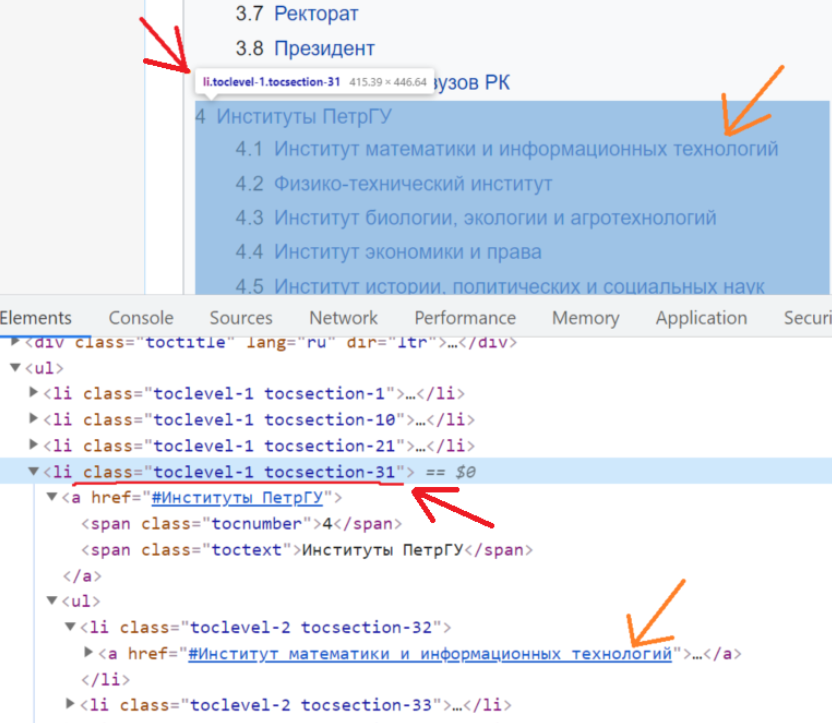

In [ ]:
a = soup.body('li', class_='toclevel-1 tocsection-31')  # Отфильтровываем теги нужного нам класса
faculties = []
child_quantity = 0  # Количество всех descendants  
filtered_child_quantity = 0  # Количество отфильтрованных  descendants  

for child in a[0].descendants:  # child - это NavigableString
    child_quantity += 1 
    st = child.string
    # Проверяем, что тег нам подходит и в тексте присутствует слово "институт"
    if isinstance(st, bs4.element.NavigableString) and re.search(r'.*институт\b', st, re.I):
        filtered_child_quantity += 1
        if st not in faculties:  # Если институт не был ранее найден
            faculties.append(st)  # Добавляем институт в список
            
print(f'child_quantity={child_quantity}, filtered_child_quantity={filtered_child_quantity}, '
      f'len(faculties)={len(faculties)}')    
faculties        

child_quantity=162, filtered_child_quantity=22, len(faculties)=11


['Институт математики и информационных технологий',
 'Физико-технический институт',
 'Институт биологии, экологии и агротехнологий',
 'Институт экономики и права',
 'Институт истории, политических и социальных наук',
 'Институт филологии',
 'Медицинский институт',
 'Институт лесных, горных и строительных наук',
 'Институт педагогики и психологии',
 'Институт иностранных языков',
 'Институт физической культуры, спорта и туризма']